# Data Analysis
Worked out some statistical tests and tried to find the relations between the different attributes and the price of the car. Used small visualisations to get a better understanding on how closely the attribute is related to the price of the car.

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("clean_df.csv", index_col=0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,normalized-height,normalized-width,normalized-length,horsepower-binned,price-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,16500.0,8.703704,11.190476,0.816054,0.890278,0.811148,Low,Low
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,19,26,16500.0,9.038462,12.368421,0.876254,0.909722,0.822681,Medium,Low
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,24,30,13950.0,7.833333,9.791667,0.908027,0.919444,0.848630,Low,Low
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,18,22,17450.0,10.681818,13.055556,0.908027,0.922222,0.848630,Low,Low
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,19,25,15250.0,9.400000,12.368421,0.887960,0.920833,0.851994,Low,Low


In [3]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
highway-L/100km      float64
city-L/100km         float64
normalized-height    float64
normalized-width     float64
normalized-length    float64
horsepower-binned     object
price-binned          object
dtype: object

### Correlation between the attributes

In [4]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,normalized-height,normalized-width,normalized-length
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145667,0.008244,...,0.074594,0.284011,-0.030158,0.041248,-0.083327,-0.033159,0.062423,-0.542261,-0.237262,-0.364511
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029867,0.055759,...,0.217323,0.239580,-0.225255,-0.182011,0.133999,0.181247,0.238712,-0.377664,0.086961,0.019433
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501534,0.144675,...,0.375689,-0.364971,-0.480029,-0.552211,0.589147,0.584953,0.484047,0.583789,0.814593,0.879005
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610817,0.120888,...,0.580515,-0.286754,-0.667658,-0.700186,0.691044,0.708466,0.659174,0.492955,0.857271,1.000000
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548478,0.182855,...,0.617062,-0.247388,-0.638155,-0.684700,0.752795,0.739845,0.677111,0.300995,1.000000,0.857271
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187794,-0.081273,...,-0.085763,-0.315756,-0.057087,-0.111568,0.137284,0.088903,0.008923,1.000000,0.300995,0.492955
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644532,0.168642,...,0.758089,-0.279411,-0.750390,-0.795515,0.834420,0.837217,0.785868,0.310660,0.867720,0.881058
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572786,0.208004,...,0.822669,-0.256702,-0.651002,-0.679877,0.872337,0.783593,0.745337,0.076255,0.731100,0.685531
bore,-0.145667,-0.029867,0.501534,0.610817,0.548478,0.187794,0.644532,0.572786,1.000000,-0.051087,...,0.566736,-0.267010,-0.581365,-0.590753,0.543431,0.558759,0.554069,0.187794,0.548478,0.610817
stroke,0.008244,0.055759,0.144675,0.120888,0.182855,-0.081273,0.168642,0.208004,-0.051087,1.000000,...,0.100547,-0.066173,-0.040677,-0.040282,0.083296,0.051148,0.041470,-0.081273,0.182855,0.120888


In [5]:
df[['bore','stroke','horsepower', 'compression-ratio']].corr()

,bore,stroke,horsepower,compression-ratio
bore,1.000000,-0.051087,0.566736,0.002021
stroke,-0.051087,1.000000,0.100547,0.186761
horsepower,0.566736,0.100547,1.000000,-0.214197
compression-ratio,0.002021,0.186761,-0.214197,1.000000


Using seaborn for visual representation of linear relationship if any

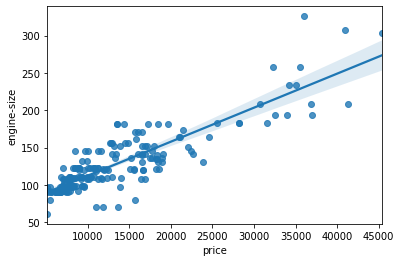

In [6]:
sns.regplot(x="price", y='engine-size', data=df)

Findings :  Price and engine price have direct correlation. This is indicated in the graph as we can see when the engine-size increase, the price of the car also increases.

In [7]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872337
price,0.872337,1.000000


The correlation value od 0.872 signifies that the correlation is strong.

Checking relation between highway mileage and price

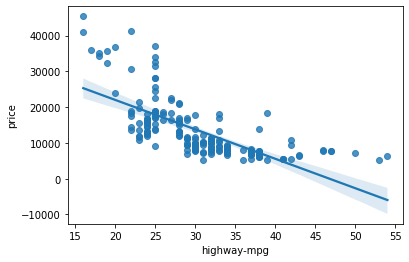

In [9]:
sns.regplot('highway-mpg', 'price', df)

As highway mileage goes up, the price for the car comes down. 

Funny how expensive cars consume more fuel.

In [12]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.705115
price,-0.705115,1.000000


The high negative correlation between these attributes proves this characteristic about car prices.

## Categorical variables

For categorical variables, we can use box plots to study the relationship  between the variables.

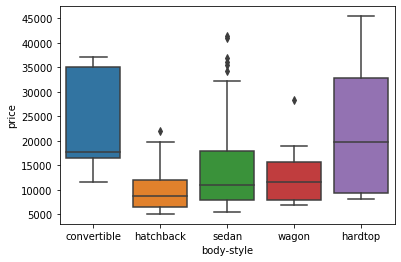

In [17]:
sns.boxplot(x='body-style', y='price', data=df)

Since there is an overlap between categories, it won't be a good predictor of price.

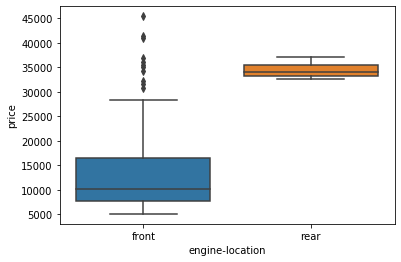

In [18]:
sns.boxplot(x="engine-location", y='price', data=df)

Here, the prices are distinct enough so that can be used as a predictor of price accurately.

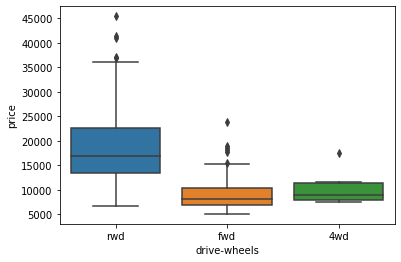

In [19]:
sns.boxplot(x='drive-wheels', y='price', data=df)

## Descriptive Analysis

In [25]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,normalized-height,normalized-width,normalized-length
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,3.330000,3.259847,...,103.358586,5118.181818,25.200000,30.705000,13205.690000,8.041663,9.937914,0.899523,0.915250,0.837232
std,1.248557,32.076542,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,0.268562,0.314177,...,37.455470,479.240110,6.432487,6.827227,7966.982558,1.844764,2.539415,0.040610,0.029207,0.059333
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.351852,4.795918,0.799331,0.837500,0.678039
25%,0.000000,100.250000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,3.150000,3.117500,...,70.000000,4800.000000,19.000000,25.000000,7775.000000,6.911765,7.833333,0.869565,0.891319,0.800937
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,...,95.000000,5159.090909,24.000000,30.000000,10270.000000,7.833333,9.791667,0.904682,0.909722,0.832292
75%,2.000000,138.250000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,3.582500,3.410000,...,116.000000,5500.000000,30.000000,34.000000,16500.750000,9.400000,12.368421,0.928512,0.926042,0.881788
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,54.000000,45400.000000,14.687500,18.076923,1.000000,1.000000,1.000000


In [26]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,74
4wd,8


In [27]:
df['engine-location'].value_counts()

front    197
rear       3
Name: engine-location, dtype: int64

## Statistical Significance

We know the correlation data about the attributes but we can check the statistical significance of the data using the pearson coefficients which will provide the P-value that shows how statistically significant the correlation data is.

In [28]:
from scipy import stats

Checking out the significance for wheel base versus price data.

In [30]:
p_coeff, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print(f"Pearson coefficient of wheel vs price will be {p_coeff} with statistical significance of {p_value}")

Pearson coefficient of wheel vs price will be 0.5891470005448702 with statistical significance of 4.4570195020504053e-20


Since the p-value of the above calculation is less than 0.001, which means that the data is strongly significant and the linear relationship is very strong.

In [31]:
p_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(f"Pearson coefficient of horsepower vs price will be {p_coeff} with statistical significance of {p_value}")

Pearson coefficient of horsepower vs price will be 0.5891470005448702 with statistical significance of 1.0089009233334328e-47


Again the p-value is less than 0.001 which means that the correlation coefficient is statistically significant.

Conducting the same test for length, width and engine-size versus price.

In [32]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6910440897821905  with a P-value of P =  9.960963222348607e-30


In [34]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.7527948631832608  with a P-value of P =  8.256714148309272e-38


In [35]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723367498521142  with a P-value of P = 1.8977171466563487e-63


From the above calculations, we get to know that the correlation coefficient of the engine-size versus price is the highest and the data is the most statistically significant among all the other data.

Using the insights we found out here, I'll build a regression model using the data.